# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [22]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [24]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [26]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [39]:
import numpy as np

#Use .1, .5, 1.0, 2.0, 4.0

x_train_noise10 = x_train + np.random.normal(0, 255*.10, x_train.shape)
x_test_noise10 = x_test + np.random.normal(0, 255*.10, x_test.shape)

x_train_noise50 = x_train + np.random.normal(0, 255*.50, x_train.shape)
x_test_noise50 = x_test + np.random.normal(0, 255*.50, x_test.shape)

x_train_noise1 = x_train + np.random.normal(0, 255*1, x_train.shape)
x_test_noise1 = x_test + np.random.normal(0, 255*1, x_test.shape)

x_train_noise2 = x_train + np.random.normal(0, 255*2, x_train.shape)
x_test_noise2 = x_test + np.random.normal(0, 255*2, x_test.shape)

x_train_noise4 = x_train + np.random.normal(0, 255*4, x_train.shape)
x_test_noise4 = x_test + np.random.normal(0, 255*4, x_test.shape)

In [28]:
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_nn = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_nn[0])
print('Test accuracy:', score_nn[1])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               401920    
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [===========================

In [29]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise10, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise10, y_test))
score_nn10 = model.evaluate(x_test_noise10, y_test, verbose=0)
print('Test loss:', score_nn10[0])
print('Test accuracy:', score_nn10[1])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 dropout_25 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [===========================

In [32]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise50, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise50, y_test))
score_nn50 = model.evaluate(x_test_noise50, y_test, verbose=0)
print('Test loss:', score_nn50[0])
print('Test accuracy:', score_nn50[1])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 512)               401920    
                                                                 
 dropout_30 (Dropout)        (None, 512)               0         
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [===========================

In [40]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise1, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise50, y_test))
score_nn1 = model.evaluate(x_test_noise1, y_test, verbose=0)
print('Test loss:', score_nn1[0])
print('Test accuracy:', score_nn1[1])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 512)               401920    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_50 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [===========================

In [41]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise2, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise2, y_test))
score_nn2 = model.evaluate(x_test_noise2, y_test, verbose=0)
print('Test loss:', score_nn2[0])
print('Test accuracy:', score_nn2[1])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 512)               401920    
                                                                 
 dropout_34 (Dropout)        (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 512)               262656    
                                                                 
 dropout_35 (Dropout)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [===========================

In [42]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise4, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise4, y_test))
score_nn4 = model.evaluate(x_test_noise4, y_test, verbose=0)
print('Test loss:', score_nn4[0])
print('Test accuracy:', score_nn4[1])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               401920    
                                                                 
 dropout_36 (Dropout)        (None, 512)               0         
                                                                 
 dense_55 (Dense)            (None, 512)               262656    
                                                                 
 dropout_37 (Dropout)        (None, 512)               0         
                                                                 
 dense_56 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [===========================

## Visualization of Loss

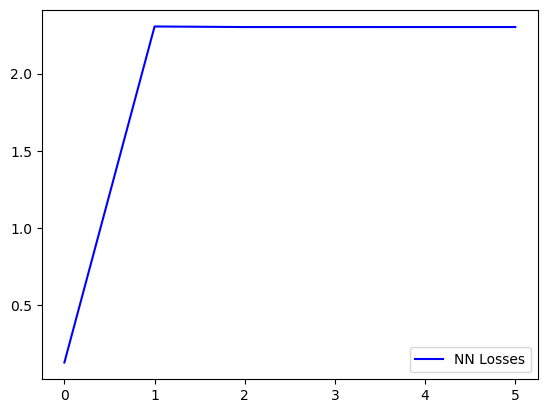

In [43]:
nn_losses = np.array([score_nn[0], score_nn10[0], score_nn50[0], score_nn1[0], score_nn2[0], score_nn4[0]])
plt.plot(nn_losses, label='NN Losses', color='b')
plt.legend()

In [44]:
nn_losses

array([0.13065316, 2.30461788, 2.30091882, 2.3009429 , 2.3010335 ,
       2.30104041])

## Visualization of Accuracy

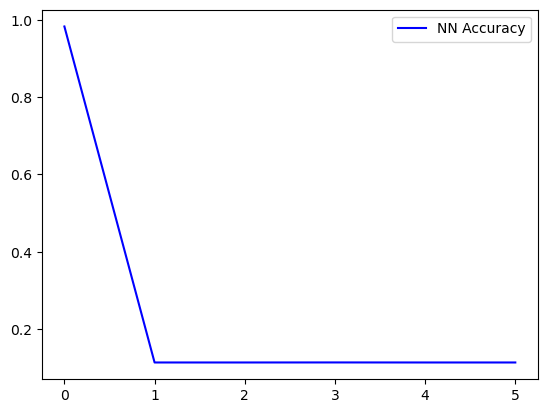

In [46]:
nn_accur = np.array([score_nn[1], score_nn10[1], score_nn50[1], score_nn1[1], score_nn2[1], score_nn4[1]])
plt.plot(nn_accur, label='NN Accuracy', color='b')
plt.legend()

In [47]:
nn_accur

array([0.98290002, 0.1135    , 0.1135    , 0.1136    , 0.1135    ,
       0.1135    ])

### As seen in the visualizations of both loss and accuracy above, adding noise (.10 to .50 to 1 to 2 to 4) greatly increases loss and decreases accuracy- even at a low level. It is interesting though that once noise wrecks the result, adding more noise does not further degrade accuracy or increase loss. 